In [1]:
import os
import sys
import warnings

os.chdir("../..")
sys.path.append("../../")
warnings.filterwarnings("ignore")

# Simulate CITE-seq data

## Introduction

In this example, we show how to use scDesign3Py to simulate CITE-seq data and illustrate the similarity between the inputted reference data and synthetic data.

## Import packages and Read in data

### import pacakges


In [2]:
import anndata as ad
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import umap
import scDesign3Py

The R project used is located at /home/ld/anaconda3/envs/pyscdesign/lib/R


### Read in the reference data


In [3]:
data = ad.read_h5ad("data/CITE.h5ad")

To save computational time, we only use the top 100 genes and six more genes with protein and RNA abundance information.


In [4]:
keep_gene = ["CD4", "CD14", "CD19", "CD34", "CD3E", "CD8A"]
keep_adt = ["ADT_CD4", "ADT_CD14", "ADT_CD19", "ADT_CD34", "ADT_CD3", "ADT_CD8"]
keep = keep_gene + keep_adt
idx = keep + data.var_names.tolist()[:100]
data = data[:, idx]
data.layers["log"] = np.log1p(data.X)
data

AnnData object with n_obs × n_vars = 8617 × 112
    obs: 'nCount_RNA', 'nFeature_RNA', 'RNA_snn_res.0.8', 'seurat_clusters', 'nCount_ADT', 'ident', 'cell_type'
    var: 'name'
    layers: 'log'

## Simulation

We input the reference data and use the one-shot function to simulate CITE-seq dat using discrete cell types as the covariates for fitting each gene’s marginal distribution.


In [5]:
test = scDesign3Py.scDesign3(n_cores=3,parallelization="pbmcmapply")
test.set_r_random_seed(123)
simu_res = test.scdesign3(
    anndata=data,
    default_assay_name="counts",
    celltype="cell_type",
    mu_formula="cell_type",
    sigma_formula="cell_type",
    family_use="nb",
    usebam=False,
    corr_formula="cell_type",
    copula="vine",
    nonnegative=True,
    nonzerovar=True,
)

R[write to console]: Input Data Construction Start

R[write to console]: Input Data Construction End

R[write to console]: Start Marginal Fitting



  |=======================================================| 100%, Elapsed 01:38


R[write to console]: Marginal Fitting End

R[write to console]: Start Copula Fitting

R[write to console]: Convert Residuals to Uniform



  |=======================================================| 100%, Elapsed 00:23


R[write to console]: Converting End

R[write to console]: Copula group Mouse starts

R[write to console]: Vine Copula Estimation Starts



Time difference of 6.06433 secs


R[write to console]: Vine Copula Estimation Ends

R[write to console]: Copula group Eryth starts

R[write to console]: Vine Copula Estimation Starts



Time difference of 1.687539 secs


R[write to console]: Vine Copula Estimation Ends

R[write to console]: Copula group NK starts

R[write to console]: Vine Copula Estimation Starts



Time difference of 20.13526 secs


R[write to console]: Vine Copula Estimation Ends

R[write to console]: Copula group CD34+ starts

R[write to console]: Vine Copula Estimation Starts



Time difference of 6.19168 secs


R[write to console]: Vine Copula Estimation Ends

R[write to console]: Copula group CD14+ Mono starts

R[write to console]: Vine Copula Estimation Starts



Time difference of 1.241982 mins


R[write to console]: Vine Copula Estimation Ends

R[write to console]: Copula group Mk starts

R[write to console]: Vine Copula Estimation Starts



Time difference of 5.72002 secs


R[write to console]: Vine Copula Estimation Ends

R[write to console]: Copula group Multiplets starts

R[write to console]: Vine Copula Estimation Starts



Time difference of 7.14301 secs


R[write to console]: Vine Copula Estimation Ends

R[write to console]: Copula group DC starts

R[write to console]: Vine Copula Estimation Starts



Time difference of 5.447203 secs


R[write to console]: Vine Copula Estimation Ends

R[write to console]: Copula group Memory CD4 T starts

R[write to console]: Vine Copula Estimation Starts



Time difference of 54.2111 secs


R[write to console]: Vine Copula Estimation Ends

R[write to console]: Copula group CD8 T starts

R[write to console]: Vine Copula Estimation Starts



Time difference of 13.68546 secs


R[write to console]: Vine Copula Estimation Ends

R[write to console]: Copula group CD16+ Mono starts

R[write to console]: Vine Copula Estimation Starts



Time difference of 11.65808 secs


R[write to console]: Vine Copula Estimation Ends

R[write to console]: Copula group B starts

R[write to console]: Vine Copula Estimation Starts



Time difference of 15.83501 secs


R[write to console]: Vine Copula Estimation Ends

R[write to console]: Copula group T/Mono doublets starts

R[write to console]: Vine Copula Estimation Starts



Time difference of 11.36812 secs


R[write to console]: Vine Copula Estimation Ends

R[write to console]: Copula group pDCs starts

R[write to console]: Vine Copula Estimation Starts



Time difference of 5.430151 secs


R[write to console]: Vine Copula Estimation Ends

R[write to console]: Copula group Naive CD4 T starts

R[write to console]: Vine Copula Estimation Starts



Time difference of 51.30871 secs


R[write to console]: Vine Copula Estimation Ends

R[write to console]: Copula Fitting End

R[write to console]: Start Parameter Extraction



  |=======================================================| 100%, Elapsed 00:35


R[write to console]: Parameter
Extraction End

R[write to console]: Start Generate New Data

R[write to console]: Use Copula to sample a multivariate quantile matrix

R[write to console]: Sample Copula group Mouse starts

R[write to console]: Sample Copula group Eryth starts

R[write to console]: Sample Copula group NK starts

R[write to console]: Sample Copula group CD34+ starts

R[write to console]: Sample Copula group CD14+ Mono starts

R[write to console]: Sample Copula group Mk starts

R[write to console]: Sample Copula group Multiplets starts

R[write to console]: Sample Copula group DC starts

R[write to console]: Sample Copula group Memory CD4 T starts

R[write to console]: Sample Copula group CD8 T starts

R[write to console]: Sample Copula group CD16+ Mono starts

R[write to console]: Sample Copula group B starts

R[write to console]: Sample Copula group T/Mono doublets starts

R[write to console]: Sample Copula group pDCs starts

R[write to console]: Sample Copula group Naiv

  |=======================================================| 100%, Elapsed 00:05


R[write to console]: New Data Generating End



After the simulation, we can create the `AnnData` object using the synthetic count matrix and store the logcounts to the input and synthetic `AnnData` objects.


In [6]:
simu_data = ad.AnnData(
    X=simu_res["new_count"], obs=simu_res["new_covariate"], layers={"log": np.log1p(simu_res["new_count"])}
)

Then, we obtained the PCA and UMAP for both the inputted reference data and the synthetic data. These sets of embedding will be used for the visualization below.


In [7]:
reducer_umap = umap.UMAP(n_neighbors=15, min_dist=0.1)
reducer_pca = PCA(n_components=50, whiten=False)

In [11]:
reducer_pca.fit(data.layers["log"].toarray())
org_pca = reducer_pca.transform(data.layers["log"].toarray())
simu_pca = reducer_pca.transform(simu_data.layers["log"])

In [12]:
reducer_umap.fit(org_pca)
org_umap = reducer_umap.transform(org_pca)
simu_umap = reducer_umap.transform(simu_pca)

## Visualization

To visualize the results, we select six genes and reformat their UMAP embedding we got in the previous step.


In [14]:
scaler = MinMaxScaler()
org_data = pd.DataFrame(
    np.concatenate([org_umap, scaler.fit_transform(data.layers["log"].toarray()[:, 0:12])], axis=1),
    columns=["UMAP1", "UMAP2"]
    + ["CD4", "CD14", "CD19", "CD34", "CD3", "CD8"]
    + ["ADT_CD4", "ADT_CD14", "ADT_CD19", "ADT_CD34", "ADT_CD3", "ADT_CD8"],
)
simu_data = pd.DataFrame(
    np.concatenate([simu_umap, scaler.fit_transform(simu_data.layers["log"][:, 0:12])], axis=1),
    columns=["UMAP1", "UMAP2"]
    + ["CD4", "CD14", "CD19", "CD34", "CD3", "CD8"]
    + ["ADT_CD4", "ADT_CD14", "ADT_CD19", "ADT_CD34", "ADT_CD3", "ADT_CD8"],
)

Six genes’ protein and RNA abundances are shown on the cell UMAP embeddings in the inputted reference data and the synthetic data below.


In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl

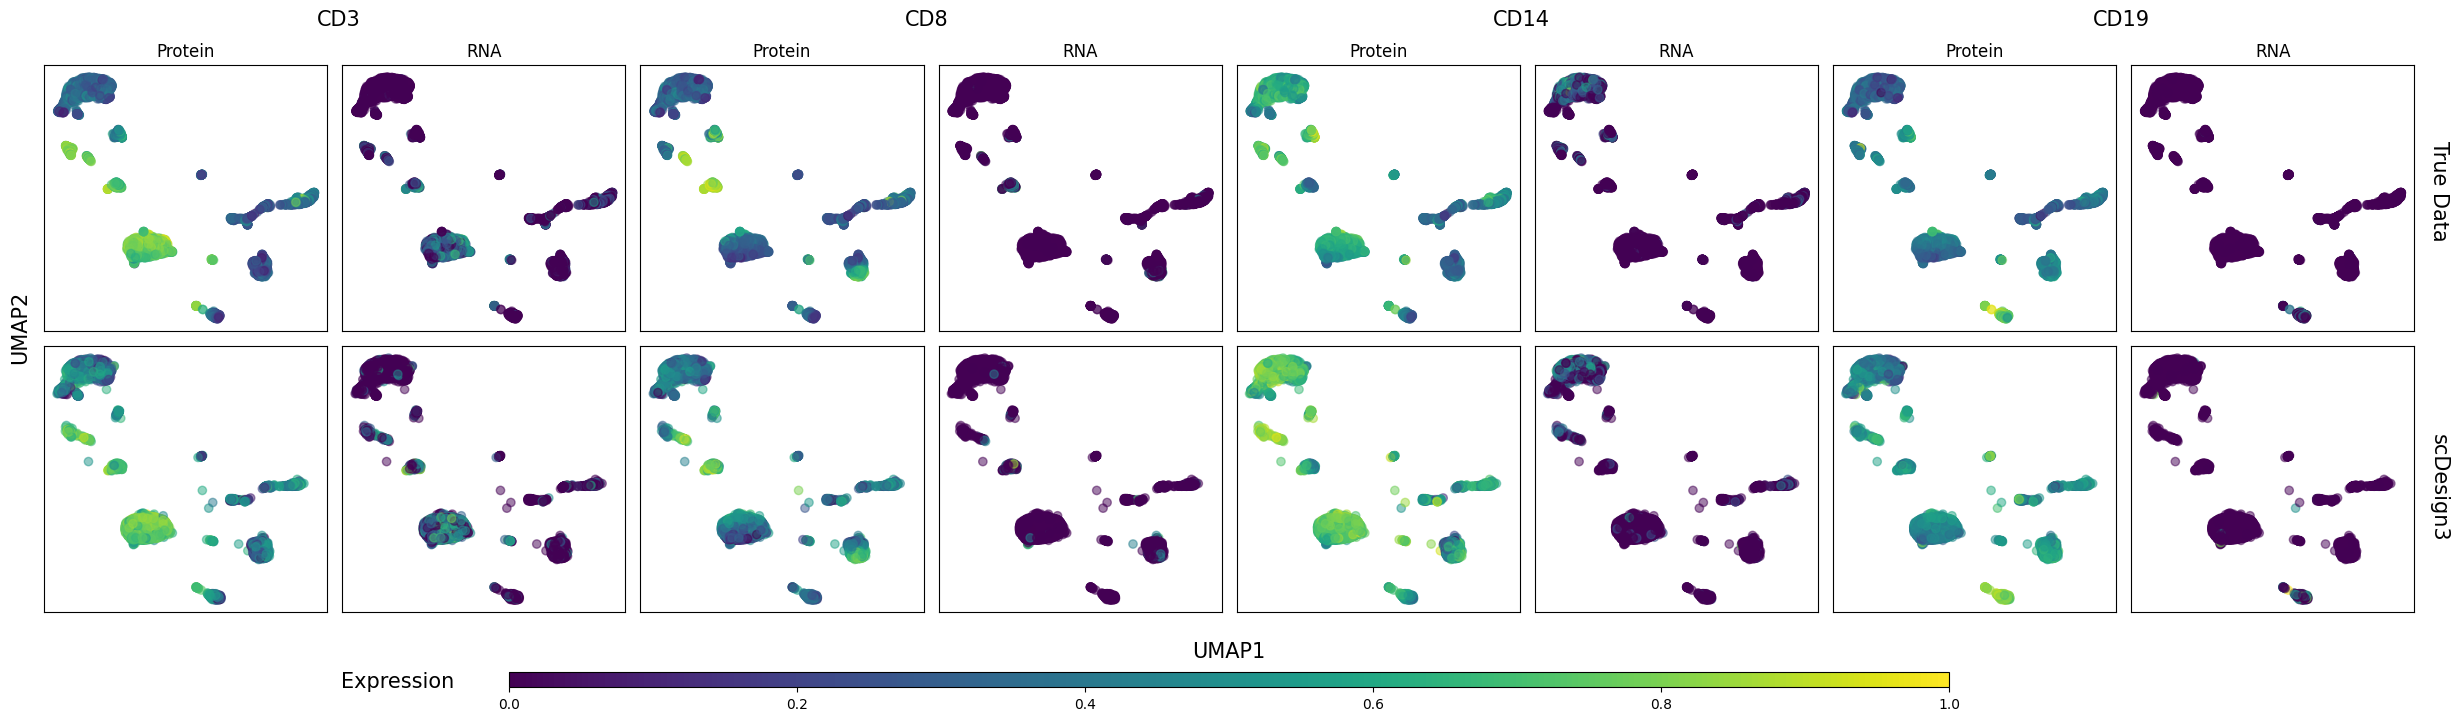

In [16]:
fig, axes = plt.subplots(2, 8, figsize=(8 * 3, 2 * 3), sharey=True, sharex=True)
colors = plt.get_cmap("viridis")
norm = plt.Normalize(vmax=1, vmin=0)

for i, name in enumerate(
    ["CD3_Protein", "CD3_RNA", "CD8_Protein", "CD8_RNA", "CD14_Protein", "CD14_RNA", "CD19_Protein", "CD19_RNA"]
):
    for j, assay in enumerate(["True Data", "scDesign3"]):
        ax = axes[j][i]
        ax.set_xticks([])
        ax.set_yticks([])
        type = name.split("_")[1]
        gene = name.split("_")[0]
        if type == "Protein":
            gene = "ADT_" + gene
        if assay == "True Data":
            dat = org_data[["UMAP1", "UMAP2", gene]]
            ax.set_title(type)
        else:
            dat = simu_data[["UMAP1", "UMAP2", gene]]

        ax.scatter(dat["UMAP1"], dat["UMAP2"], c=dat[gene], alpha=0.5)

fig.tight_layout()
fig.text(0.5, -0.05, "UMAP1", ha="center", fontsize=15)
fig.text(-0.008, 0.5, "UMAP2", va="center", rotation="vertical", fontsize=15)
fig.text(1, 0.65, "True Data", fontsize=15, rotation=270)
fig.text(1, 0.15, "scDesign3", fontsize=15, rotation=270)

fig.text(0.12, 1.003, "CD3", fontsize=15)
fig.text(0.365, 1.003, "CD8", fontsize=15)
fig.text(0.61, 1.003, "CD14", fontsize=15)
fig.text(0.86, 1.003, "CD19", fontsize=15)

position = fig.add_axes([0.2, -0.1, 0.60, 0.025])
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=colors), cax=position, orientation="horizontal")
fig.text(0.13, -0.1, "Expression", fontsize=15)

plt.show()